<a href="https://colab.research.google.com/github/Pantodynamos/HeartAttackML/blob/main/FinalProjectBigData_Matthew_21k10060.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Christopher Matthew / 21.K1.0060

Step 1 : Importing library,
pandas for data analysis dan manipulation,
matplotlib for data visualizations,
seaborn is a library for data visualizations based on matplotlib,
axes 3d for 3d plot,
sklearn for machine learning library, in this case kmeans and data preparation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Step 2 : Upload the data into google colab and read the data using panda library, after that we look at the data info and description.

In [ ]:
df = pd.read_csv("/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 8.7+ KB


Step 3 : Visualize the data using matplotlib and seaborn to help understand the data

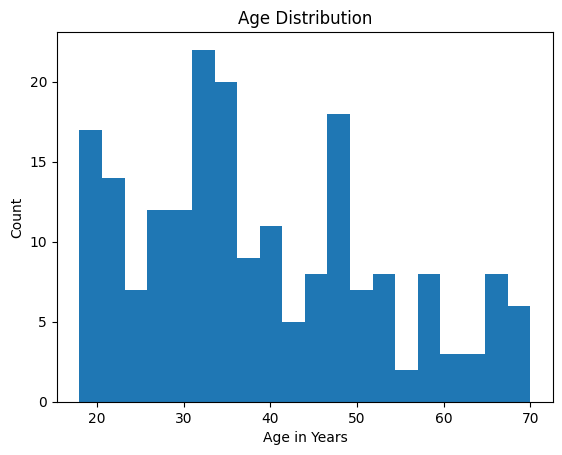

In [ ]:
plt.hist(df.Age, bins=20)
plt.title("Age Distribution")
plt.ylabel("Count")
plt.xlabel("Age in Years")
plt.show()

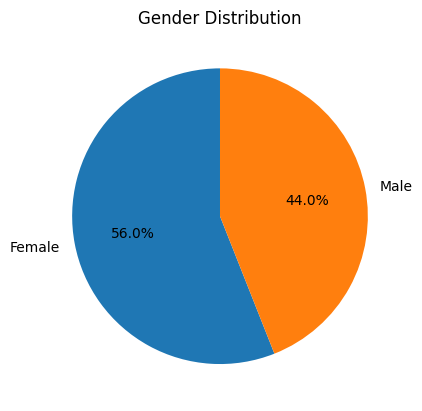

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

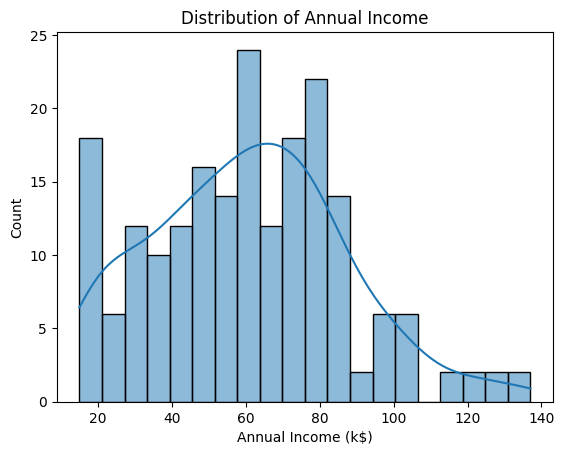

In [ ]:
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.show()

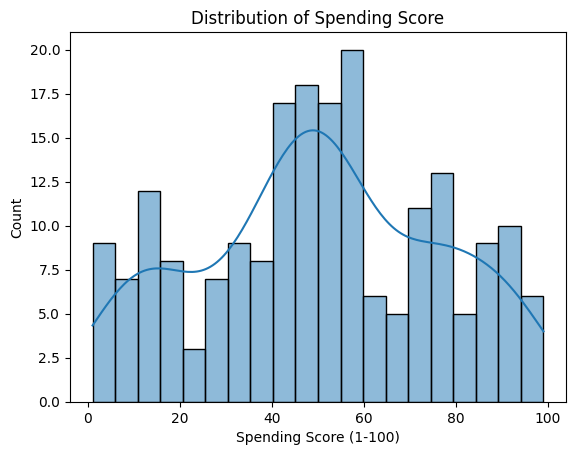

In [ ]:
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.show()

Step 4 : Data Preparation (Gender from M/F to 0/1 and data scaling)

In [ ]:
features = df[['Age', 'Annual Income (k$)',	'Spending Score (1-100)', 'Gender']]
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
numerical_transformer = StandardScaler()

In [ ]:
categorical_features = ['Gender']
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
features_scaled = preprocessor.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Step 5 : Find the optimal count of cluster using elbow method

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

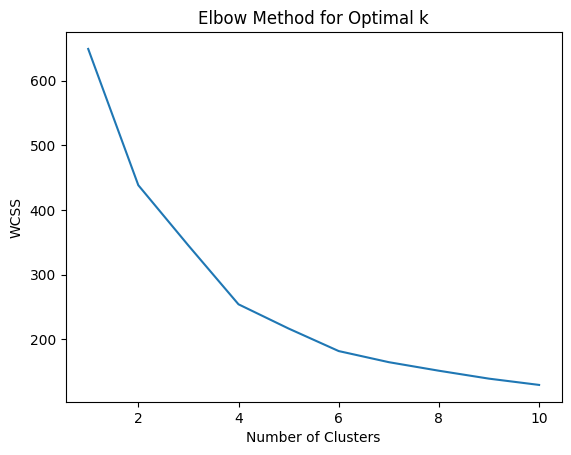

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
cluster_count = 5

Step 6 : Start creating the k-means cluster

In [ ]:
kmeans = KMeans(n_clusters=cluster_count, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(features_scaled)

In [ ]:
print(df[['Age',  'Annual Income (k$)',	'Spending Score (1-100)', 'Gender', 'Cluster']])

     Age  Annual Income (k$)  Spending Score (1-100)  Gender  Cluster
0     19                  15                      39    Male        0
1     21                  15                      81    Male        4
2     20                  16                       6  Female        0
3     23                  16                      77  Female        4
4     31                  17                      40  Female        0
..   ...                 ...                     ...     ...      ...
195   35                 120                      79  Female        3
196   45                 126                      28  Female        1
197   32                 126                      74    Male        3
198   32                 137                      18    Male        1
199   30                 137                      83    Male        3

[200 rows x 5 columns]


Step 7 : Visualize the cluster to help understand the data and gain insight from it, in this case for customer segmentation we can understand which customer cluster the company need to target, the cluster with the higher spending score and if possible also having a high annual income.

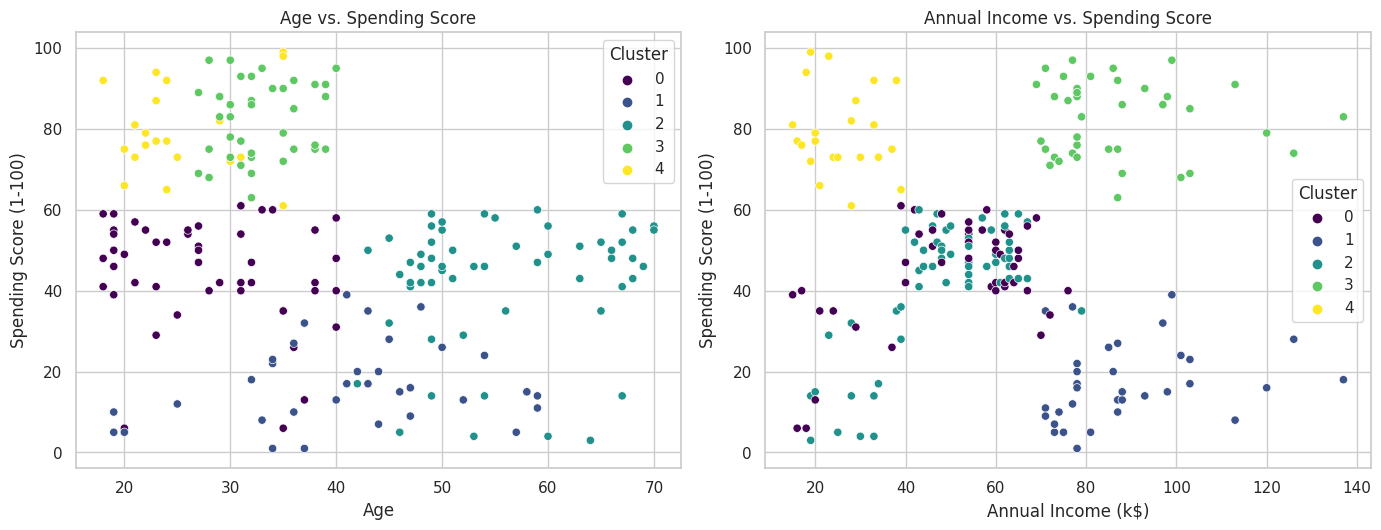

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Age vs. Spending Score')


plt.subplot(2, 2, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Annual Income vs. Spending Score')


plt.tight_layout()
plt.show()

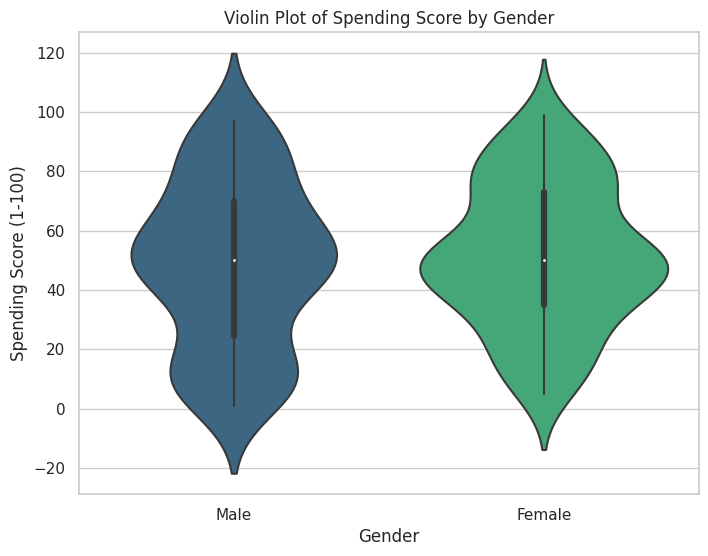

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the clustered data
plt.figure(figsize=(8, 6))

# Violin plot: Gender vs. Spending Score
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df, palette='viridis')
plt.title('Violin Plot of Spending Score by Gender')
plt.show()


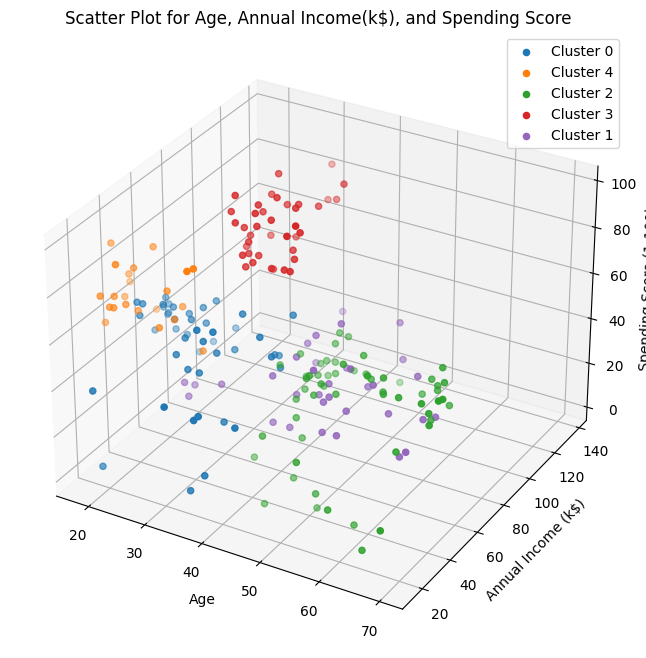

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


for cluster_label in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_label]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster_label}')


ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')


ax.set_title('Scatter Plot for Age, Annual Income(k$), and Spending Score')


ax.legend()

#
plt.show()

Conclusion : Using K-Means clustering can help with customer segmentation, customer segmentation is very important in a business to understand which cluster of your customer has the most value so you can focus on them or maybe finding which cluster of the customer with lowest value and trying to fix the problem so the overall customer value will increase which in the end will result in more profit for the company.